In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import warnings
warnings.filterwarnings('ignore')

# Read CSV file

In [76]:
df = pd.read_csv('AmesHousing.csv')
df.drop(['PID', 'Order'], axis=1, inplace=True)

- Mô tả của dữ liệu dược nói rõ hơn ở trong file [data_description.txt](./data_description.txt)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

1. Đặc điểm lô đất:
    - `MS SubClass`: Loại nhà (one-story, two-story, etc.)
    - `MS Zoning`: Phân vùng khu vực (Residential, Commercial, etc.)
    - `Lot Frontage`: Chiều dài mặt tiền
    - `Lot Area`: Diện tích lô đất
    - `Street`: Đường tiếp giáp (Paved, Gravel, etc.)
    - `Alley`: Lối đi phía sau nhà (Paved, Gravel, etc.)
    - `Lot Shape`: Hình dạng lô đất (Regular, Irregular, etc.)
    - `Land Contour`: Địa hình (Flat, Hilly, etc.)
    - `Utilities`: Tiện ích có sẵn (All public utilities, No sewer, etc.)
    - `Lot Config`: Cấu hình lô đất (Inside, Corner, etc.)
    - `Land Slope`: Độ dốc đất (Flat, Slight Slope, etc.)
    - `Neighborhood`: Vùng lân cận

2. Đặc điểm nhà:
    - `Condition 1`: Tình trạng nhà (Excellent, Good, etc.)
    - `Condition 2`: Tình trạng nhà phụ thuộc
    - `Bldg Type`: Kiểu nhà (Detached, Two-family attached, etc.)
    - `House Style`: Kiểu dáng nhà (Cape Cod, Colonial, etc.)
    - `Overall Qual`: Chất lượng xây dựng tổng thể
    - `Overall Cond`: Tình trạng nhà tổng thể
    - `Year Built`: Năm xây dựng
    - `Year Remod`/Add: Năm cải tạo/cơi nới
    - `Roof Style`: Kiểu mái (Gable, Hip, etc.)
    - `Roof Matl`: Vật liệu mái (Metal, Slate, etc.)
    - `Exterior 1st`: Vật liệu ngoại thất chính
    - `Exterior 2nd`: Vật liệu ngoại thất phụ
    - `Mas Vnr` Type: Kiểu ốp mặt tiền
    - `Mas Vnr` Area: Diện tích ốp mặt tiền
    - `Exter Qual`: Chất lượng ngoại thất
    - `Exter Cond`: Tình trạng ngoại thất
    - `Foundation:` Kiểu móng nhà
    - `Bsmt Qual`: Chất lượng tầng hầm
    - `Bsmt Cond`: Tình trạng tầng hầm
    - `Bsmt Exposure`: Mức độ tiếp xúc của tầng hầm với mặt đất
    - `BsmtFin Type 1`: Kiểu hoàn thiện tầng hầm 1
    - `BsmtFin SF 1`: Diện tích hoàn thiện tầng hầm 1
    - `BsmtFin Type 2`: Kiểu hoàn thiện tầng hầm 2
    - `BsmtFin SF 2`: Diện tích hoàn thiện tầng hầm 2
    - `Bsmt Unf SF`: Diện tích chưa hoàn thiện của tầng hầm
    - `Total Bsmt SF`: Tổng diện tích tầng hầm


3. Đặc điểm hệ thống:
    - `Heating`: Hệ thống sưởi ấm
    - `Heating QC`: Chất lượng hệ thống sưởi ấm
    - `Central Air`: Điều hòa không khí
    - `Electrical`: Hệ thống điện


4. Diện tích:
    - `1st Flr SF`: Diện tích tầng 1
    - `2nd Flr SF`: Diện tích tầng 2
    - `Low Qual Fin SF`: Diện tích hoàn thiện chất lượng thấp
    - `Gr Liv Area`: Diện tích sàn sinh hoạt


5. Phòng tắm và phòng ngủ:
    - `Bsmt Full Bath`: Số phòng tắm đầy đủ tầng hầm
    - `Bsmt Half Bath`: Số phòng tắm nửa tầng hầm
    - `Full Bath`: Số phòng tắm đầy đủ
    - `Half Bath`: Số phòng tắm nửa
    - `Bedroom AbvGr`: Số phòng ngủ trên tầng
    - `Kitchen AbvGr`: Số bếp trên tầng


6. Đặc điểm khác:
    - `Kitchen Qual`: Chất lượng nhà bếp
    - `TotRms AbvGrd`: Tổng số phòng trên tầng
    - `Functional`: Chức năng tổng thể của nhà
    - `Fireplaces`: Số lò sưởi
    - `Fireplace Qu`: Chất lượng lò sưởi
    - `Garage Type`: Kiểu gara
    - `Garage Yr Blt`: Năm xây dựng gara
    - `Garage Finish`: Hoàn thiện gara
    - `Garage Cars`: Số chỗ đỗ xe trong gara
    - `Garage Area`: Diện tích gara
    - `Garage Qual`: Chất lượng gara
    - `Garage Cond`: Tình trạng gara
    - `Paved Drive`: Đường lái xe được lát đá
    - `Wood Deck SF`: Diện tích sàn gỗ
    - `Open Porch SF`: Diện tích hiên mở
    - `Enclosed Porch`: Diện tích hiên kín
    - `3Ssn Porch`: Diện tích hiên nhà ba mùa tính bằng mét vuông

- Danh sách các features có kiểu dữ liệu là numerical và categorical

In [78]:
numerical_features = df.select_dtypes(exclude=['object'])
print(f"Chúng ta có {numerical_features.shape[1]} columns numerical: \n", numerical_features.columns)

Chúng ta có 37 columns numerical: 
 Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


In [79]:
categorical_features = df.select_dtypes(include=['object'])
print(f"Chúng ta có {categorical_features.shape[1]} columns numerical: \n", categorical_features.columns)

Chúng ta có 43 columns numerical: 
 Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


# Phân tích dữ liệu

## Missing values

In [80]:
missing_data_count = df.isnull().sum()

missing_data = pd.DataFrame({
    'Count': missing_data_count,
})
missing_data = missing_data[missing_data.Count > 0]
print("Missing data columns:", missing_data.index)
missing_data.sort_values(by='Count', ascending=False, inplace=True)


print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

Missing data columns: Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')
There are 27 features having missing data.

Top 10 missing value features:


,Count
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Cond,159
Garage Qual,159
Garage Finish,159


In [81]:
for i in missing_data.index:
    print(f"Feature {i} has {df[i].isnull().sum()} missing values type: {df[i].dtype}.")

Feature Pool QC has 2917 missing values type: object.
Feature Misc Feature has 2824 missing values type: object.
Feature Alley has 2732 missing values type: object.
Feature Fence has 2358 missing values type: object.
Feature Mas Vnr Type has 1775 missing values type: object.
Feature Fireplace Qu has 1422 missing values type: object.
Feature Lot Frontage has 490 missing values type: float64.
Feature Garage Cond has 159 missing values type: object.
Feature Garage Qual has 159 missing values type: object.
Feature Garage Finish has 159 missing values type: object.
Feature Garage Yr Blt has 159 missing values type: float64.
Feature Garage Type has 157 missing values type: object.
Feature Bsmt Exposure has 83 missing values type: object.
Feature BsmtFin Type 2 has 81 missing values type: object.
Feature Bsmt Cond has 80 missing values type: object.
Feature Bsmt Qual has 80 missing values type: object.
Feature BsmtFin Type 1 has 80 missing values type: object.
Feature Mas Vnr Area has 23 miss

- Dựa vào file [data_description.txt](./data_description.txt):

    - Ta có thể chia các dữ liệu ra như sau:

        1. Bao gồm các categorical features khi NA có nghĩa là không có tính năng đó trong nhà: `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Garage Type`, `Garage Finish`, `Garage Qual`, `Garage Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Mas Vnr Type` (15 features)
        Với group này ta sẽ fillna với giá trị: 'None'.

        2. Bao gồm các numerical features khi NA có nghĩa là không có tính năng đó trong nhà: `Garage Area`, `Garage Cars`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Mas Vnr Area` (10 features)
        Với group này ta sẽ fillna với giá trị: 0.

        3. `Electrical`: fill với giá trị xuất hiện nhiều nhất.

        4. `Lot Frontage`: fill với giá trị trung bình của feature

        5. `Garage Yr Blt`: fill với giá trị bằng với giá trị của YearBuilt



In [82]:
# Fill categorical features with 'None'
missing_categorical_features = ['Pool QC', 'Misc Feature', 'Alley', 'Fence',
                        'Fireplace Qu', 'Garage Type', 'Garage Finish', 
                        'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 
                        'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
                        'Mas Vnr Type']

df[missing_categorical_features] = df[missing_categorical_features].fillna('None')

# Fill numerical features with 0
missing_numerical_features = ['Garage Area', 'Garage Cars', 'BsmtFin SF 1',
                      'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                      'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area']
df[missing_numerical_features] = df[missing_numerical_features].fillna(0)

# Fill 'Electrical' with the most frequent value
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Fill 'Lot Frontage' with the mean value
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

# Fill 'Garage Yr Blt' with the value of 'YearBuilt'
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])


In [83]:
# Update numerical features and categorical features
numerical_features = df.select_dtypes(exclude=['object'])
categorical_features = df.select_dtypes(include=['object'])

## Features Selection


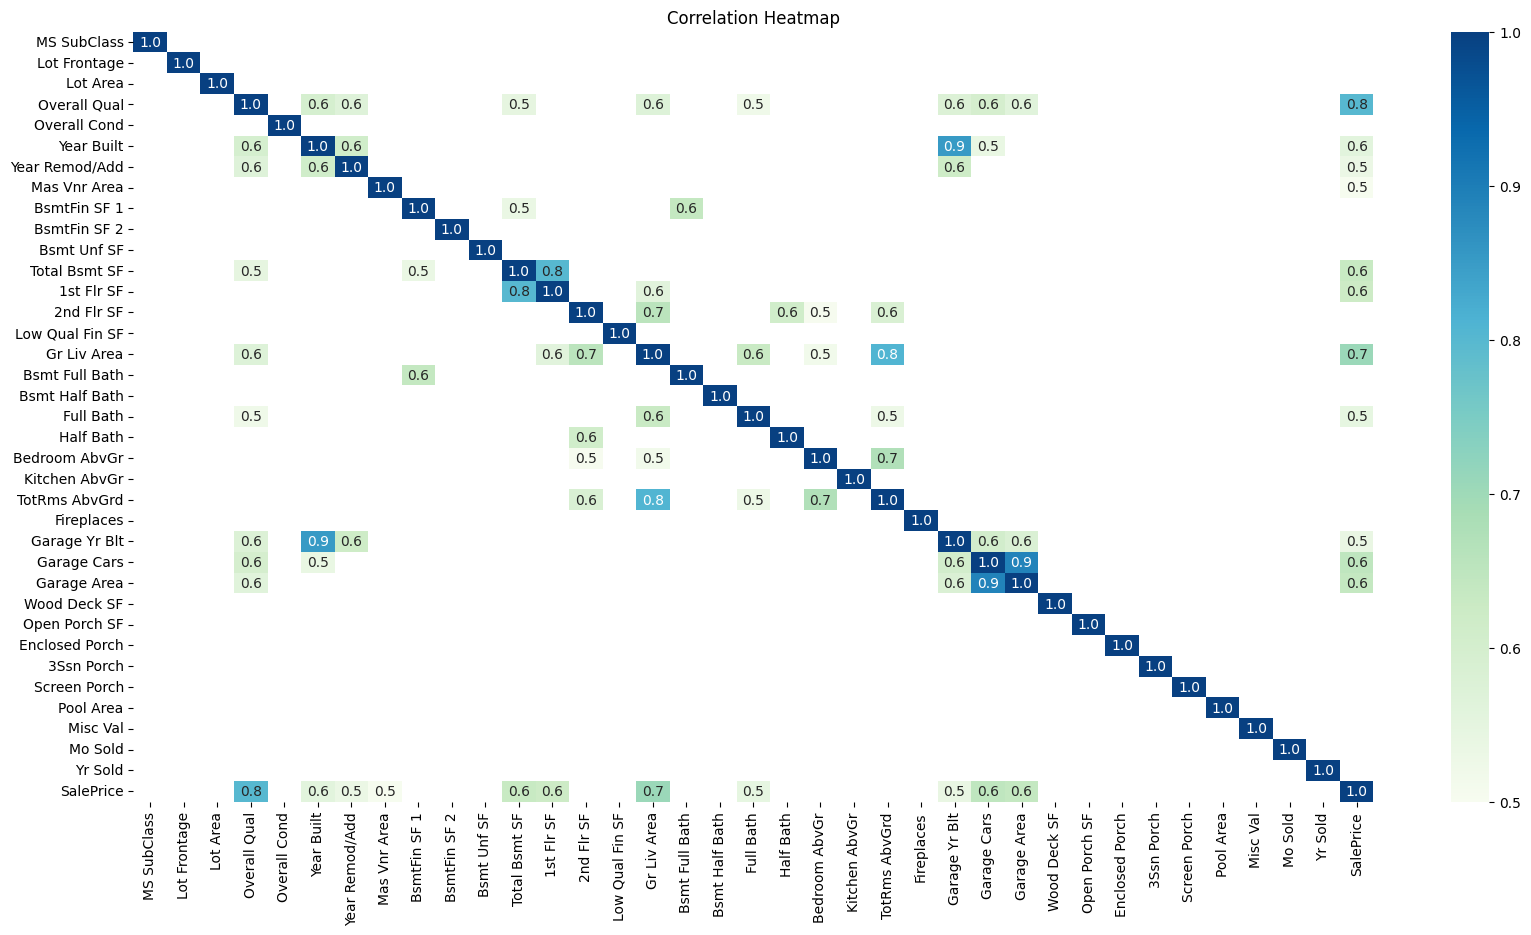

In [84]:
corr_mat = numerical_features.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

## Tiếp theo ta cần xem các mối quan hệ giữa các feature với SalePrice


In [85]:
# Using correlation to find the most important numerical features
corr_matrix = numerical_features.corr()['SalePrice'].sort_values()

corr_greater_50 = corr_matrix[corr_matrix > 0.5]

corr_greater_50

Mas Vnr Area      0.502196
Year Remod/Add    0.532974
Garage Yr Blt     0.540262
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632529
Garage Area       0.640138
Garage Cars       0.647562
Gr Liv Area       0.706780
Overall Qual      0.799262
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [86]:
# Để cho chắc chắn hơn ta có thể sử dụng RFE với LogisticRegression để tìm ra những feature quan trọng nhất
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
rfe.fit(numerical_features, numerical_features['SalePrice'])

numerical_features.columns[rfe.support_]

Index(['Lot Area', 'Year Built', 'Year Remod/Add', 'Bsmt Unf SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Yr Blt', 'Misc Val', 'Yr Sold', 'SalePrice'],
      dtype='object')

## Khai phá dữ liệu


<Axes: >

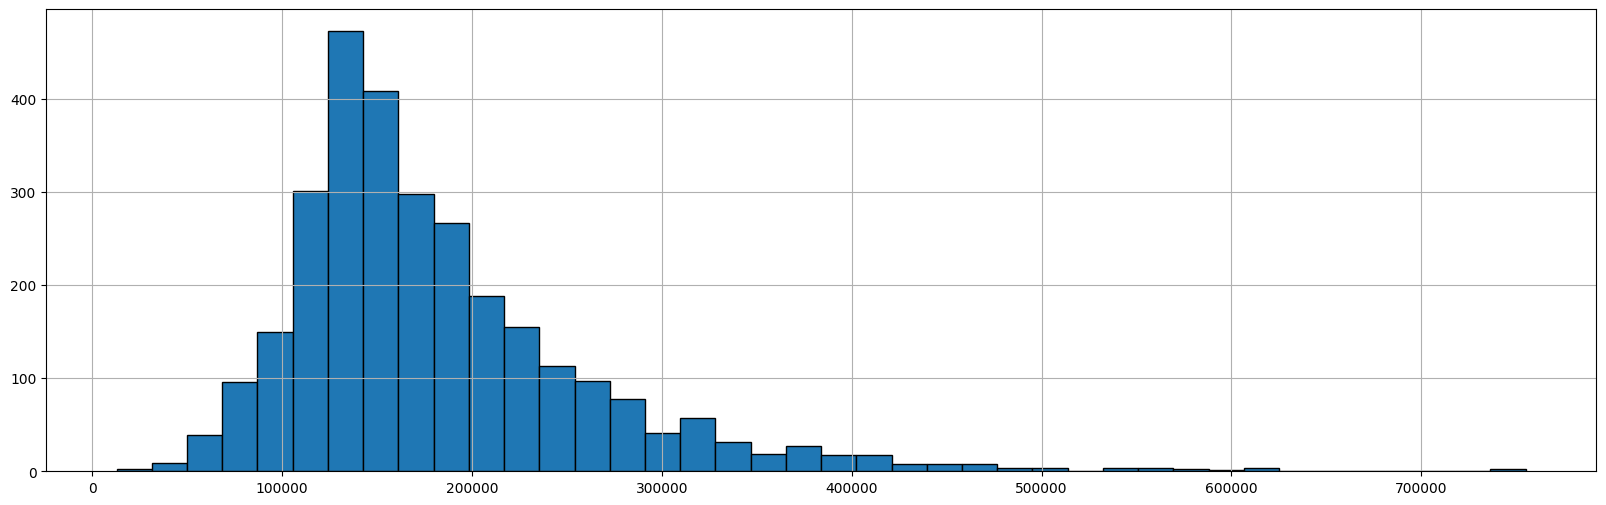

In [87]:
# Vẽ biểu đồ phân phối của SalePrice
df['SalePrice'].hist(bins=40, ec='black', figsize=(20,6))

- Từ biểu đồ trên ta thấy được biểu đồ này đang bị **lệch phải** (right-skewed)